# Task 2: Exploratory Data Analysis on Titanic Dataset

The Titanic disaster of 1912 remains one of the most infamous maritime tragedies in history.
This dataset from Kaggle
 contains passenger details such as age, gender, class, and survival status.

 Our goal: Explore patterns that influenced survival using data analysis and visualization.

**Step 1: Load the Data**

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid", palette="muted")

# Load dataset
df = pd.read_csv("C:/Users/PMLS/OneDrive/Desktop/datasets/Titanic-Dataset.csv")
print("Dataset shape:", df.shape)
df.head()


Dataset shape: (891, 12)


,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


The dataset has over 800 passengers, with details such as age, sex, passenger class, ticket, and whether they survived (1) or not (0).

**Step 2: Data Overview**

In [3]:
df.info()
df.describe()
df.isnull().sum()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

We quickly notice missing values in Age, Cabin, and Embarked. Cabin has too many missing entries, so we’ll simplify that later.

**Step 3: Cleaning the Data**

In [4]:
# Fill missing Age with median
df["Age"].fillna(df["Age"].median(), inplace=True)

# Fill missing Embarked with most common value
df["Embarked"].fillna(df["Embarked"].mode()[0], inplace=True)

# Feature: Does the passenger have a cabin?
df["HasCabin"] = df["Cabin"].notnull().astype(int)

# Drop Cabin column
df.drop(columns=["Cabin"], inplace=True)


C:\Users\PMLS\AppData\Local\Temp\ipykernel_21244\2775992026.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df["Age"].fillna(df["Age"].median(), inplace=True)
C:\Users\PMLS\AppData\Local\Temp\ipykernel_21244\2775992026.py:5: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For exa

Now the dataset is clean and ready for analysis.

**Step 4: Who Survived? (First Look)**

In [5]:
df.groupby("Sex")["Survived"].mean()
df.groupby("Pclass")["Survived"].mean()


Pclass
1    0.629630
2    0.472826
3    0.242363
Name: Survived, dtype: float64

A quick calculation reveals two striking facts:

Women survived at a much higher rate than men.

First-class passengers were far more likely to survive compared to third-class.

**Step 5: Visualizing the Story**

1. Gender & Survival

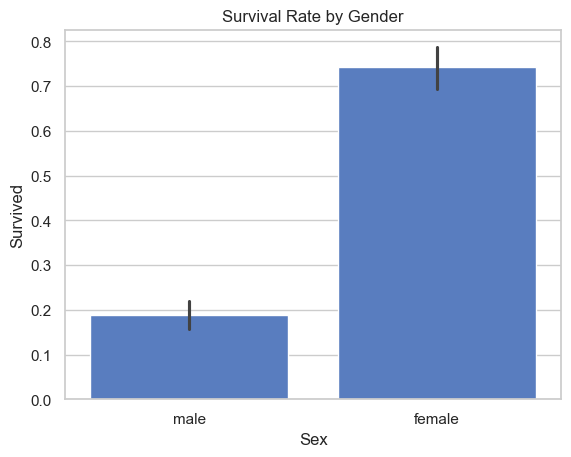

In [6]:
sns.barplot(x="Sex", y="Survived", data=df)
plt.title("Survival Rate by Gender")
plt.show()


The classic “women and children first” policy is evident: females had a much higher chance of survival.

**2. Class & Survival**

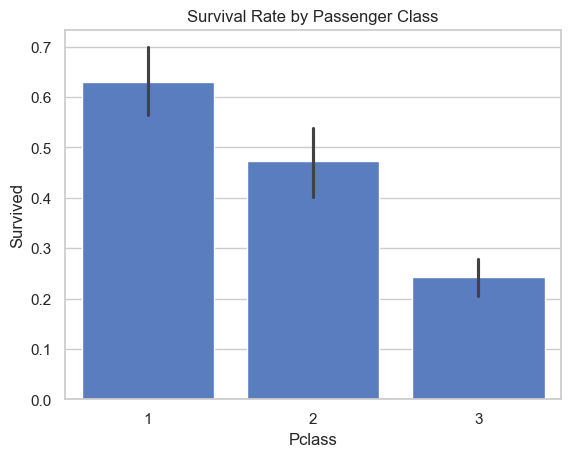

In [7]:
sns.barplot(x="Pclass", y="Survived", data=df)
plt.title("Survival Rate by Passenger Class")
plt.show()


We see social class differences — first-class passengers had the best chance of survival, while third-class suffered the most losses.

**3. Age Distribution**

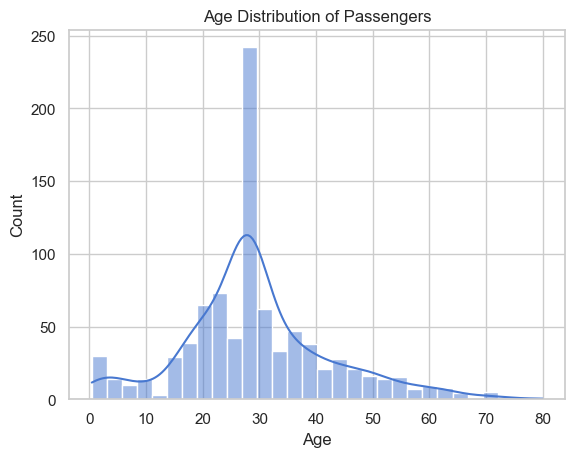

In [8]:
sns.histplot(df["Age"], bins=30, kde=True)
plt.title("Age Distribution of Passengers")
plt.show()


Most passengers were young adults, but children also made up a significant portion of survivors.

**4. Correlation Heatmap**

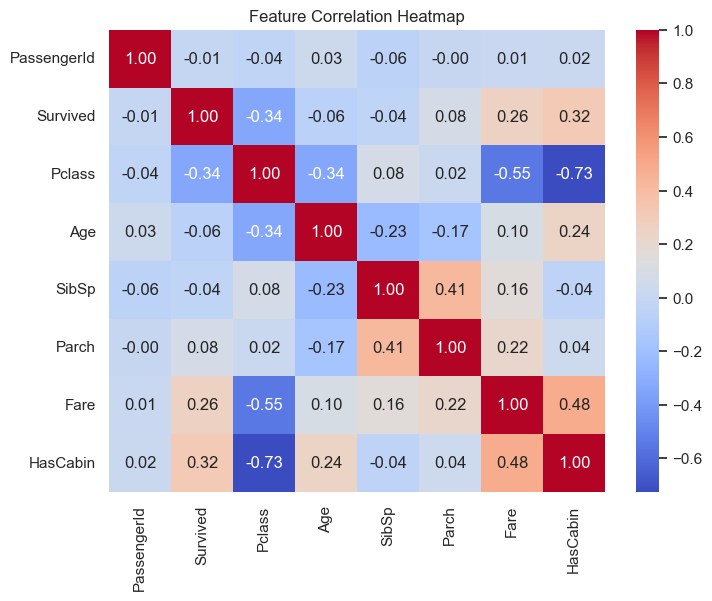

In [10]:
plt.figure(figsize=(8,6))
numeric_df = df.select_dtypes(include=[np.number])
sns.heatmap(numeric_df.corr(), annot=True, cmap="coolwarm", fmt=".2f")
plt.title("Feature Correlation Heatmap")
plt.show()


**Step 6: Survival by Class & Gender**

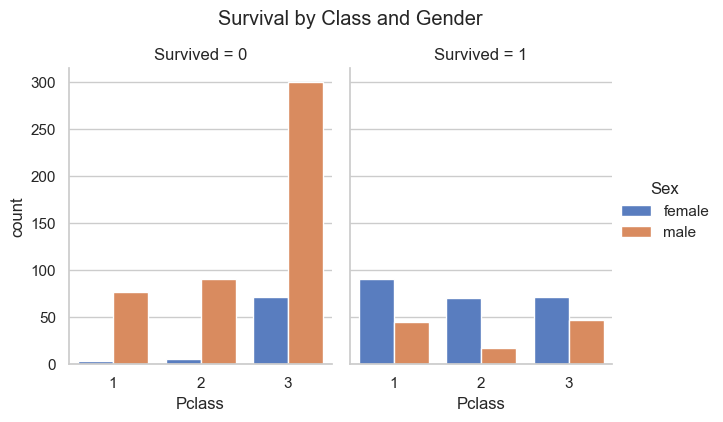

In [11]:
sns.catplot(x="Pclass", hue="Sex", col="Survived", data=df, kind="count", height=4, aspect=0.8)
plt.suptitle("Survival by Class and Gender", y=1.05)
plt.show()


Women in higher classes had the best survival chances. Men in third class had the worst.

**Survival by Embarkation Port**

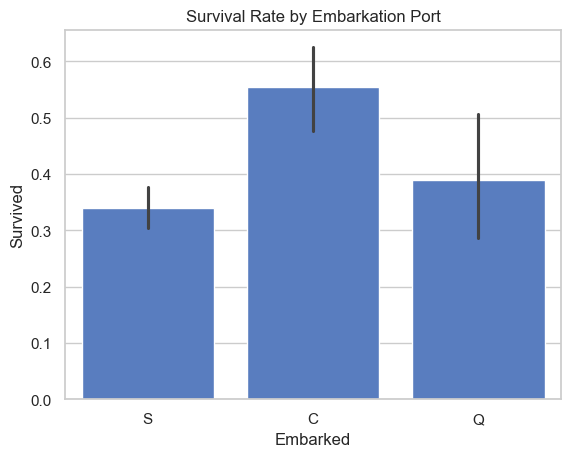

In [12]:
sns.barplot(x="Embarked", y="Survived", data=df)
plt.title("Survival Rate by Embarkation Port")
plt.show()


Passengers who boarded at Cherbourg (C) had better survival chances compared to Southampton (S) or Queenstown (Q).

**Final Takeaways**

* Gender was the most important factor: women had far higher survival chances.
* Class mattered a lot: first-class passengers were prioritized in rescue.
* Age played a role: children had better survival odds.
* Boarding location had an influence: Cherbourg passengers fared better.
* The Titanic dataset tells a story of social structure, privilege, and the harsh realities of the disaster.